# **Task-5: EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES**

#### IMPORTING LIBRARIES

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### READING DATA

In [113]:
df = pd.read_csv("cognoriseDatasets\ds_salaries.csv")
df.pop("Unnamed: 0")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [114]:
df.shape

(607, 11)

In [115]:
df = df.drop_duplicates()
df.shape

(565, 11)

In [116]:
df.shape

(565, 11)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


In [118]:
df = df[df["salary"]<30000000] #considered as outlier

#### STATISTICAL ANALYSIS FOR NUMERICAL FEATURES

In [119]:
num_df = df.select_dtypes(include=["int"])
num_df.pop("work_year")
num_df.agg(["min","max","mean","median","std","skew","kurt"])

,salary,salary_in_usd,remote_ratio
min,4.000000e+03,2859.000000,0.000000
max,1.100000e+07,600000.000000,100.000000
mean,2.848148e+05,110735.471631,69.858156
median,1.107125e+05,100000.000000,100.000000
std,9.778198e+05,72283.592761,40.917294
skew,7.859489e+00,1.732165,-0.847507
kurt,7.005757e+01,6.453422,-0.978269


#### DISTRIBUTION OF CATEGORICAL FEATURES

<Axes: xlabel='remote_ratio', ylabel='count'>

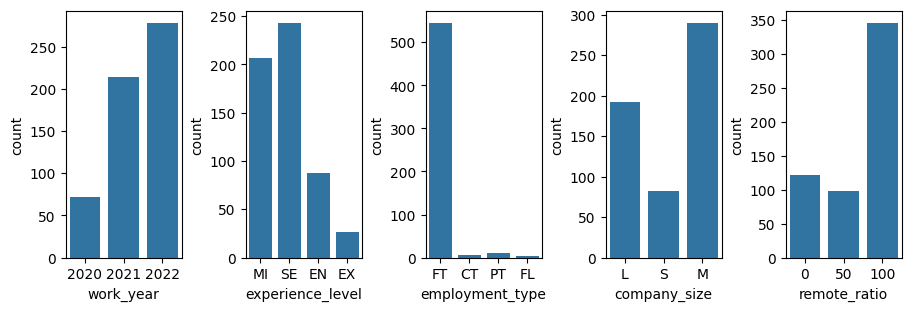

In [120]:
fig,axs = plt.subplots(1,5,figsize=(9,3),layout="constrained")
sns.countplot(data=df,x="work_year",ax=axs[0])
sns.countplot(data=df,x="experience_level",ax=axs[1])
sns.countplot(data=df,x="employment_type",ax=axs[2])
sns.countplot(data=df,x="company_size",ax=axs[3])
sns.countplot(data=df,x="remote_ratio",ax=axs[4])

#### EXPERIENCE LEVEL BASED ON SALARY

<Axes: xlabel='experience_level', ylabel='salary'>

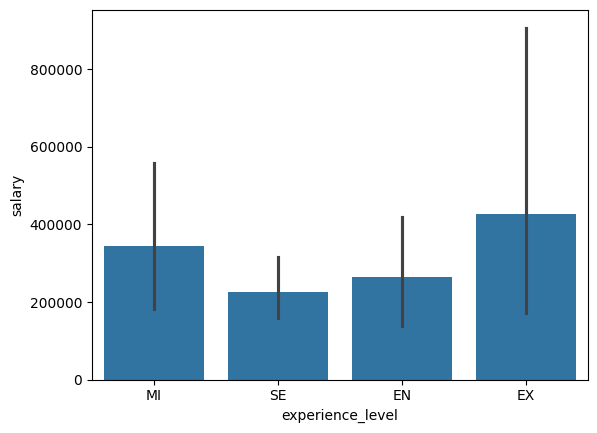

In [121]:
sns.barplot(data=df,x="experience_level",y="salary")

#### REALTION BETWEEN SALARY AND SALARY IN USD

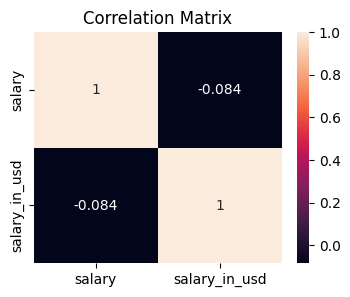

In [122]:
correlation_matrix = df[["salary","salary_in_usd"]].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### AVERAGE SALARY BASED ON EXPERIENCE LEVEL

<Axes: xlabel='remote_ratio'>

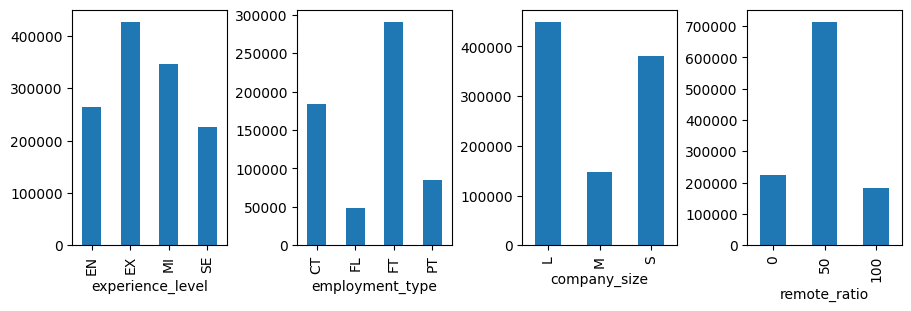

In [123]:
fig,axs = plt.subplots(1,4,figsize=(9,3),layout="constrained")
exp_avg = df.groupby("experience_level")["salary"].mean()
exp_avg.plot(kind="bar",ax=axs[0])
type_avg = df.groupby("employment_type")["salary"].mean()
type_avg.plot(kind="bar",ax=axs[1])
size_avg = df.groupby("company_size")["salary"].mean()
size_avg.plot(kind="bar",ax=axs[2])
ratio_avg = df.groupby("remote_ratio")["salary"].mean()
ratio_avg.plot(kind="bar",ax=axs[3])

#### AVERAGE SALARY IN USD BASED ON EXPERIENCE LEVEL

<Axes: xlabel='remote_ratio'>

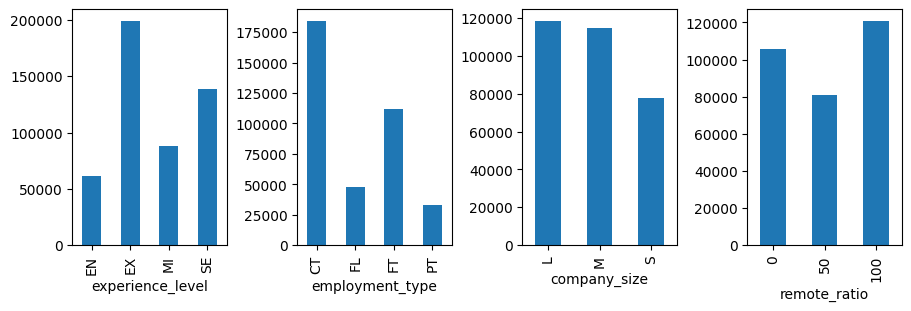

In [124]:
fig,axs = plt.subplots(1,4,figsize=(9,3),layout="constrained")
exp_avg = df.groupby("experience_level")["salary_in_usd"].mean()
exp_avg.plot(kind="bar",ax=axs[0])
type_avg = df.groupby("employment_type")["salary_in_usd"].mean()
type_avg.plot(kind="bar",ax=axs[1])
size_avg = df.groupby("company_size")["salary_in_usd"].mean()
size_avg.plot(kind="bar",ax=axs[2])
ratio_avg = df.groupby("remote_ratio")["salary_in_usd"].mean()
ratio_avg.plot(kind="bar",ax=axs[3])

#### HIGHEST SALARY

In [125]:
df.loc[df["salary"]==df["salary"].max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
102,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L


#### TOP 5 JOB TITLES

In [126]:
df["job_title"].value_counts().head(5)

job_title
Data Scientist               129
Data Engineer                121
Data Analyst                  82
Machine Learning Engineer     39
Research Scientist            16
Name: count, dtype: int64

#### TOP 5 JOB TITLE HAVING HIGHEST SALARY

In [127]:
job_grp = df.groupby("job_title")["salary"].sum()
first_5 = job_grp.sort_values(ascending=False).head(5)
first_5

job_title
Data Scientist          40270490
Data Engineer           22074373
ML Engineer             16060000
Data Science Manager    12751183
BI Data Analyst         11412272
Name: salary, dtype: int64

<Axes: xlabel='job_title', ylabel='salary'>

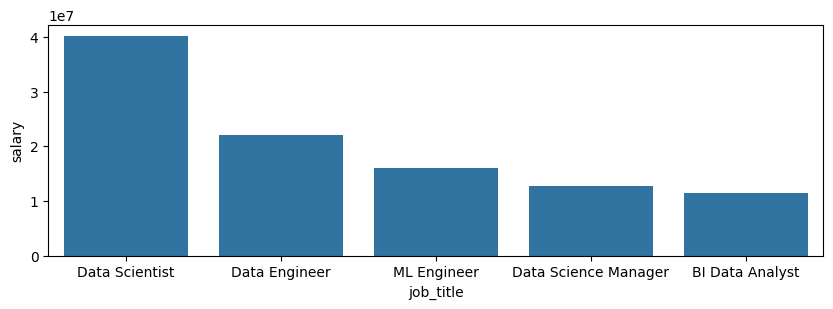

In [128]:
fig=plt.figure(figsize=(10,3))
sns.barplot(data = first_5)

#### TOP 5 CURRENCY 

In [129]:
df["salary_currency"].value_counts().head(5)

salary_currency
USD    359
EUR     93
GBP     43
INR     27
CAD     18
Name: count, dtype: int64

#### TOP 5 EMPLOYEE RESIDENCE

In [130]:
df["employee_residence"].value_counts().head(5)

employee_residence
US    295
GB     43
IN     30
CA     27
DE     24
Name: count, dtype: int64

#### TOP 5 EMPLOYEE RESIDENCE HAVING MAXIMUM SALARY

In [131]:
res = df.groupby("employee_residence")["salary"].sum()
res.sort_values(ascending=False).head(5)

employee_residence
IN    56104997
US    44480765
HU    22000000
JP    20492000
CA     3074900
Name: salary, dtype: int64

#### YEAR VS SALARY

<Axes: xlabel='work_year', ylabel='salary'>

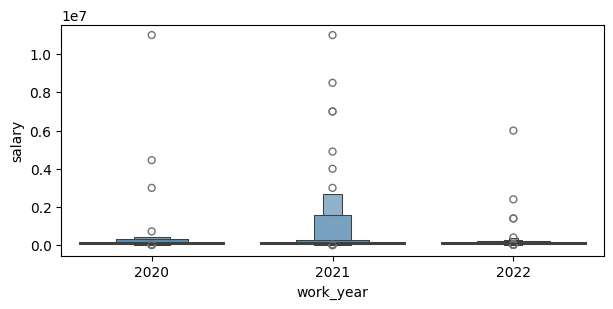

In [132]:
fig=plt.figure(figsize=(7,3))
sns.boxenplot(data=df,x="work_year",y="salary")

#### RELATION BETWEEN EXPERIENCE LEVEL AND SALARY

<Axes: xlabel='experience_level', ylabel='salary'>

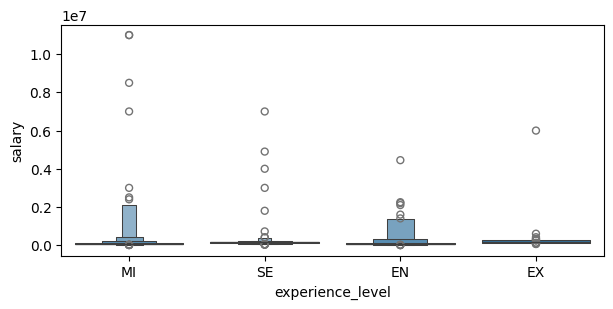

In [133]:
fig=plt.figure(figsize=(7,3))
sns.boxenplot(data=df,x="experience_level",y="salary")

<Axes: xlabel='employment_type', ylabel='salary'>

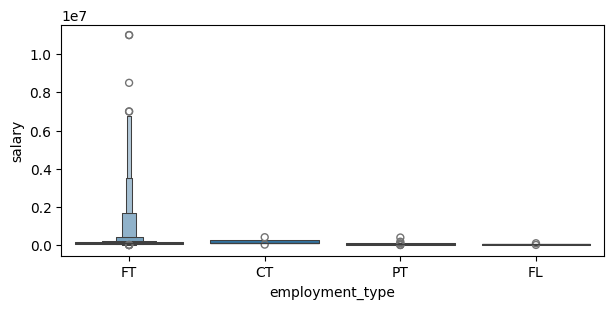

In [134]:
fig=plt.figure(figsize=(7,3))
sns.boxenplot(data=df,x="employment_type",y="salary")

#### EXPERIENCE LEVEL BY COMPANY SIZE

<Axes: xlabel='experience_level', ylabel='count'>

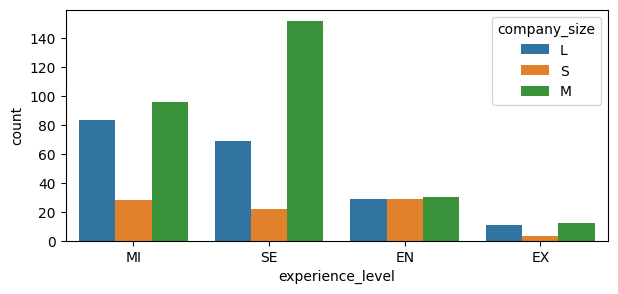

In [135]:
fig=plt.figure(figsize=(7,3))
sns.countplot(data=df,x="experience_level",hue="company_size")

<Axes: xlabel='experience_level', ylabel='salary'>

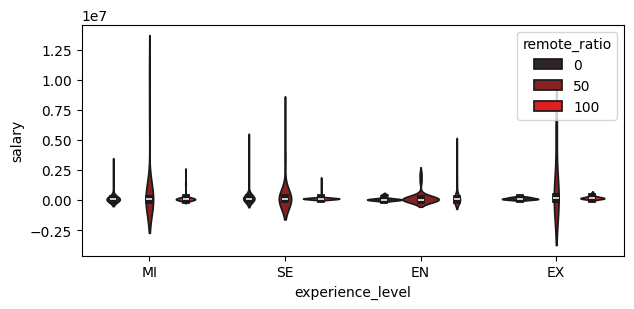

In [136]:
fig=plt.figure(figsize=(7,3))
sns.violinplot(data=df,x="experience_level",y="salary",hue="remote_ratio",palette='dark:red')